Analyse impact of Take Profit and Stop Loss orders

In [1]:
pip install python-binance

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install ta

Note: you may need to restart the kernel to use updated packages.


<h1>Import Dataset</h1>

In [22]:
import pandas as pd
from binance.client import Client
import ta
import matplotlib.pyplot as plt
import numpy as np

client = Client(tld='us')

klinesT = client.get_historical_klines("BTCUSDT", Client.KLINE_INTERVAL_2HOUR, "01 October 2020", '2022-06-15')

df = pd.DataFrame(klinesT, columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_av', 'trades', 'tb_base_av', 'tb_quote_av', 'ignore' ])
df['close'] = pd.to_numeric(df['close'])
df['high'] = pd.to_numeric(df['high'])
df['low'] = pd.to_numeric(df['low'])
df['open'] = pd.to_numeric(df['open'])

df = df.set_index(df['timestamp'])
df.index = pd.to_datetime(df.index, unit='ms')
del df['timestamp']
print(df)

                         open      high       low     close       volume  \
timestamp                                                                  
2020-10-01 00:00:00  10782.79  10845.70  10781.48  10845.38   4.86343200   
2020-10-01 02:00:00  10850.27  10853.66  10794.14  10796.06   1.31809500   
2020-10-01 04:00:00  10798.21  10825.97  10794.15  10821.13   5.87793600   
2020-10-01 06:00:00  10820.10  10845.50  10810.40  10811.12   3.64530400   
2020-10-01 08:00:00  10828.22  10912.76  10816.32  10898.17  29.61301300   
...                       ...       ...       ...       ...          ...   
2022-06-14 16:00:00  22688.66  22779.51  22348.06  22363.40  79.45352600   
2022-06-14 18:00:00  22379.52  22587.76  22122.41  22206.61  41.46622800   
2022-06-14 20:00:00  22209.91  22241.95  21374.23  21483.70  63.89722100   
2022-06-14 22:00:00  21495.74  22323.88  21485.69  22129.68  71.84898200   
2022-06-15 00:00:00  22116.09  22299.53  21750.98  22157.90  59.92078900   

           

<h1>Backtest Execution</h1>

In [23]:
df.drop(df.columns.difference(['open','high','low','close','volume']), axis=1, inplace=True)
df['EMA1']=ta.trend.ema_indicator(close=df['close'], window=25)
df['EMA2']=ta.trend.ema_indicator(close=df['close'], window=38)
df

,open,high,low,close,volume,EMA1,EMA2
timestamp,,,,,,,
2020-10-01 00:00:00,10782.79,10845.70,10781.48,10845.38,4.86343200,NaN,NaN
2020-10-01 02:00:00,10850.27,10853.66,10794.14,10796.06,1.31809500,NaN,NaN
2020-10-01 04:00:00,10798.21,10825.97,10794.15,10821.13,5.87793600,NaN,NaN
2020-10-01 06:00:00,10820.10,10845.50,10810.40,10811.12,3.64530400,NaN,NaN
2020-10-01 08:00:00,10828.22,10912.76,10816.32,10898.17,29.61301300,NaN,NaN
...,...,...,...,...,...,...,...
2022-06-14 16:00:00,22688.66,22779.51,22348.06,22363.40,79.45352600,23832.609315,24811.853474
2022-06-14 18:00:00,22379.52,22587.76,22122.41,22206.61,41.46622800,23707.532444,24678.251244
2022-06-14 20:00:00,22209.91,22241.95,21374.23,21483.70,63.89722100,23536.468410,24514.428104


In [24]:
def plot_wallet_vs_asset(df_days, log=False):
    days = df_days.copy()
    fig, ax_left = plt.subplots(figsize=(15, 20), nrows=4, ncols=1)

    ax_left[0].title.set_text("Wallet evolution")
    ax_left[0].plot(days['wallet'], color='royalblue', lw=1)
    if log:
        ax_left[0].set_yscale('log')
    ax_left[0].fill_between(days['wallet'].index, days['wallet'], alpha=0.2, color='royalblue')
    ax_left[0].axhline(y=days.iloc[0]['wallet'], color='black', alpha=0.3)
    ax_left[0].legend(['Wallet evolution'], loc ="upper left")

    ax_left[1].title.set_text("Asset evolution")
    ax_left[1].plot(days['price'], color='sandybrown', lw=1)
    if log:
        ax_left[1].set_yscale('log')
    ax_left[1].fill_between(days['price'].index, days['price'], alpha=0.2, color='sandybrown')
    ax_left[1].axhline(y=days.iloc[0]['price'], color='black', alpha=0.3)
    ax_left[1].legend(['Asset evolution'], loc ="upper left")

    ax_left[2].title.set_text("Drawdown curve")
    ax_left[2].plot(-days['drawdown_pct']*100, color='indianred', lw=1)
    ax_left[2].fill_between(days['drawdown_pct'].index, -days['drawdown_pct']*100, alpha=0.2, color='indianred')
    ax_left[2].axhline(y=0, color='black', alpha=0.3)
    ax_left[2].legend(['Drawdown in %'], loc ="lower left")

    ax_right = ax_left[3].twinx()
    if log:
        ax_left[3].set_yscale('log')
        ax_right.set_yscale('log')

    ax_left[3].title.set_text("Wallet VS Asset (not on the same scale)")
    ax_left[3].set_yticks([])
    ax_right.set_yticks([])
    ax_left[3].plot(days['wallet'], color='royalblue', lw=1)
    ax_right.plot(days['price'], color='sandybrown', lw=1)
    ax_left[3].legend(['Wallet evolution'], loc ="lower right")
    ax_right.legend(['Asset evolution'], loc ="upper left")

<h1>Spot Backtest</h1>

C:\Users\antoi\AppData\Local\Temp\ipykernel_30188\3021218834.py:68: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dt = pd.concat([dt, myrow_df], ignore_index=True)


Period : [2020-10-01 00:00:00] -> [2022-06-15 00:00:00]
Starting balance : 1000 $
Final balance : 1111.97 $
Performance vs US Dollar : 11.2 %
Buy and Hold Performence : 104.31 %
Performance vs Buy and Hold : -89.26 %
Number of negative trades :  40
Number of positive trades :  28
Average Positive Trades :  4.77 %
Average Negative Trades :  -2.83 %
Best trade +4.95 %, the  2020-10-10 02:00:00
Worst trade -3.05 %, the  2021-07-05 10:00:00
Worst drawBack -28.000000000000004 %
Total fee :  108.38 $
Buy Market number : 68
Sell Market number : 7
Sell Take Profit number : 27
Sell Stop Loss number : 34


,date,position,reason,price,frais,fiat,coins,wallet,drawBack,resultat,resultat%,tradeIs
date,,,,,,,,,,,,
2020-10-05 10:00:00,2020-10-05 10:00:00,Buy,Buy Market,10670.6400,0.700000,0,0.093649,999.300000,0.000000,NaN,NaN,
2020-10-07 04:00:00,2020-10-07 04:00:00,Sell,Sell Market,10611.3900,0.695626,993.055642,0.000000,993.055642,-0.006249,-6.244358,-0.624873,Bad
2020-10-08 14:00:00,2020-10-08 14:00:00,Buy,Buy Market,10904.5000,0.695139,0,0.091005,992.360503,-0.006944,NaN,NaN,
2020-10-10 02:00:00,2020-10-10 02:00:00,Sell,Sell Take Profit,11449.7250,0.520989,1041.457539,0.000000,1041.457539,0.000000,49.097036,4.947500,Good
2020-10-18 10:00:00,2020-10-18 10:00:00,Buy,Buy Market,11416.8100,0.729020,0,0.091158,1040.728518,-0.000700,NaN,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-30 20:00:00,2022-05-30 20:00:00,Sell,Sell Take Profit,31250.6460,0.592626,1184.660108,0.000000,1184.660108,-0.234157,55.847980,4.947500,Good
2022-06-06 02:00:00,2022-06-06 02:00:00,Buy,Buy Market,31253.8700,0.829262,0,0.037878,1183.830846,-0.234693,NaN,NaN,
2022-06-07 00:00:00,2022-06-07 00:00:00,Sell,Sell Stop Loss,30316.2539,0.574158,1147.741763,0.000000,1147.741763,-0.258023,-36.089083,-3.048500,Bad


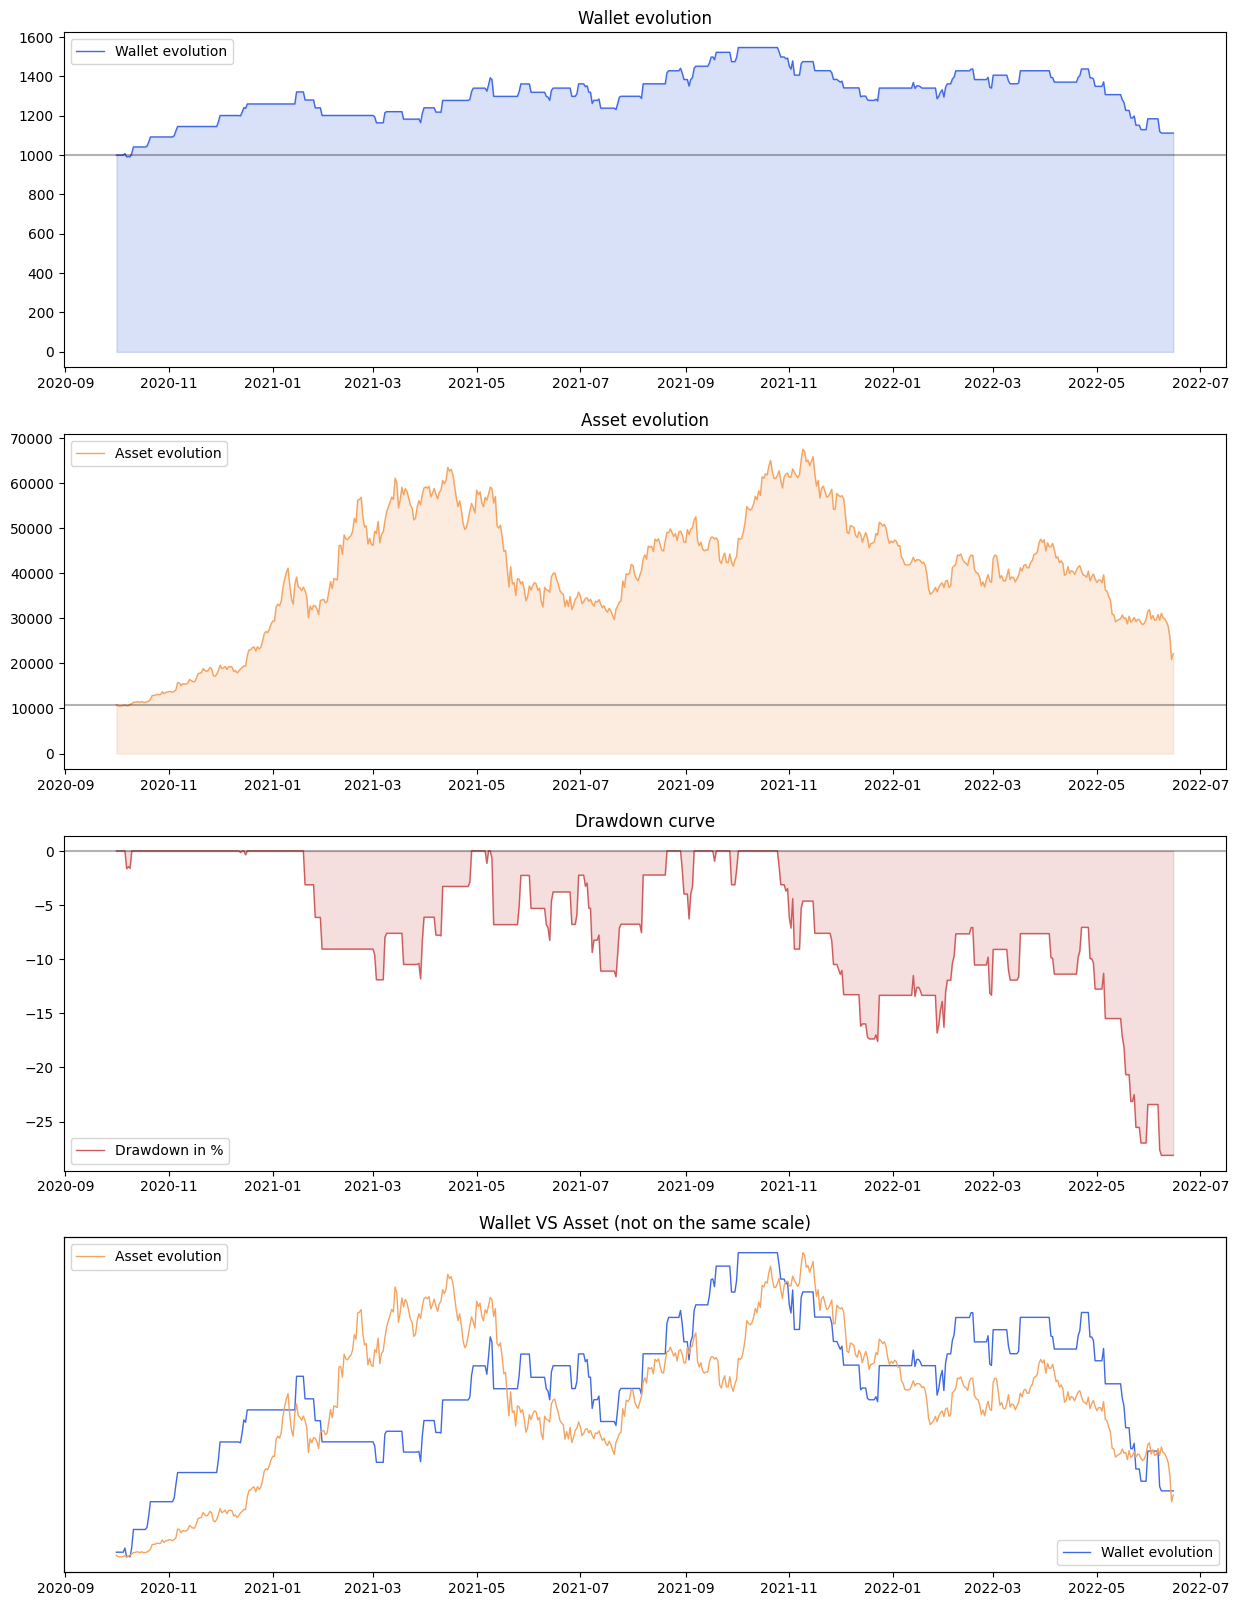

In [29]:
dfTest = df.copy()
dt = None
dt = pd.DataFrame(columns = ['date','position', 'reason', 'price', 'frais' ,'fiat', 'coins', 'wallet', 'drawBack'])
days_history = []
previous_day = 0

usdt = 1000
initalWallet = usdt
coin = 0
wallet = 1000
lastAth = 0
previousRow = dfTest.iloc[0]
makerFee = 0.0005
takerFee = 0.0007
stopLoss = 0
takeProfit = 999999
buyReady = True
sellReady = True

def buyCondition(row, previousRow):
  if row['EMA1'] > row['EMA2']:
    return True
  else:
    return False


def sellCondition(row, previousRow):
  if row['EMA2'] > row['EMA1']:
    return True
  else:
    return False


for index, row in dfTest.iterrows():

  #Keep track of the evolution of our portfolio each day for later analysis
  current_day = index.day
  if previous_day != current_day:
      temp_wallet = wallet
      if coin > 0:
          temp_wallet = coin*row['close']
      days_history.append({
          "day":str(index.year)+"-"+str(index.month)+"-"+str(index.day),
          "wallet":temp_wallet,
          "price":row['close']})
  previous_day = current_day
    
  #Buy market order
  if buyCondition(row, previousRow) == True and usdt > 0 and buyReady == True:
    #You can define here at what price you buy
    buyPrice = row['close']

    #Define the price of you SL and TP or comment it if you don't want a SL or TP
    stopLoss = buyPrice - 0.03 * buyPrice
    takeProfit = buyPrice + 0.05 * buyPrice

    coin = usdt / buyPrice
    fee = takerFee * coin
    coin = coin - fee
    usdt = 0
    wallet = coin * row['close']
    if wallet > lastAth:
      lastAth = wallet

    # print("Buy COIN at",buyPrice,'$ the', index)
    myrow = {'date': index,'position': "Buy", 'reason': 'Buy Market','price': buyPrice,'frais': fee*row['close'],'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
    myrow_df = pd.DataFrame([myrow])
    dt = pd.concat([dt, myrow_df], ignore_index=True)

  #Stop Loss
  elif row['low'] < stopLoss and coin > 0:

    sellPrice = stopLoss

    usdt = coin * sellPrice
    fee = makerFee * usdt
    usdt = usdt - fee
    coin = 0
    buyReady = False
    wallet = usdt
    if wallet > lastAth:
      lastAth = wallet
    # print("Sell COIN at Stop Loss",sellPrice,'$ the', index)
    myrow = {'date': index,'position': "Sell", 'reason': 'Sell Stop Loss', 'price': sellPrice, 'frais': fee, 'fiat': usdt, 'coins': coin, 'wallet': wallet, 'drawBack':(wallet-lastAth)/lastAth}
    myrow_df = pd.DataFrame([myrow])
    dt = pd.concat([dt, myrow_df], ignore_index=True)

  #Take Profit
  elif row['high'] > takeProfit and coin > 0:

    sellPrice = takeProfit

    usdt = coin * sellPrice
    fee = makerFee * usdt
    usdt = usdt - fee
    coin = 0
    buyReady = False
    wallet = usdt
    if wallet > lastAth:
      lastAth = wallet
    # print("Sell COIN at Take Profit Loss",sellPrice,'$ the', index)
    myrow = {'date': index,'position': "Sell", 'reason': 'Sell Take Profit', 'price': sellPrice, 'frais': fee, 'fiat': usdt, 'coins': coin, 'wallet': wallet, 'drawBack':(wallet-lastAth)/lastAth}
    myrow_df = pd.DataFrame([myrow])
    dt = pd.concat([dt, myrow_df], ignore_index=True)

  # Sell Market
  elif sellCondition(row, previousRow) == True:
    buyReady = True
    if coin > 0 and sellReady == True:
      sellPrice = row['close']
      usdt = coin * sellPrice
      frais = takerFee * usdt
      usdt = usdt - frais
      coin = 0
      wallet = usdt
      if wallet > lastAth:
        lastAth = wallet
      # print("Sell COIN at",sellPrice,'$ the', index)
      myrow = {'date': index,'position': "Sell", 'reason': 'Sell Market', 'price': sellPrice, 'frais': frais, 'fiat': usdt, 'coins': coin, 'wallet': wallet, 'drawBack':(wallet-lastAth)/lastAth}
      myrow_df = pd.DataFrame([myrow])
      dt = pd.concat([dt, myrow_df], ignore_index=True)

  previousRow = row

df_days = pd.DataFrame(days_history)
df_days['day'] = pd.to_datetime(df_days['day'])
df_days = df_days.set_index(df_days['day'])
df_days['wallet_ath'] = df_days['wallet'].cummax()
df_days['drawdown'] = df_days['wallet_ath'] - df_days['wallet']
df_days['drawdown_pct'] = df_days['drawdown'] / df_days['wallet_ath']

#///////////////////////////////////////
print("Period : [" + str(dfTest.index[0]) + "] -> [" +str(dfTest.index[len(dfTest)-1]) + "]")
dt = dt.set_index(dt['date'])
dt.index = pd.to_datetime(dt.index)
dt['resultat'] = dt['wallet'].diff()
dt['resultat%'] = dt['wallet'].pct_change()*100
dt.loc[dt['position']=='Buy','resultat'] = None
dt.loc[dt['position']=='Buy','resultat%'] = None

dt['tradeIs'] = ''
dt.loc[dt['resultat']>0,'tradeIs'] = 'Good'
dt.loc[dt['resultat']<=0,'tradeIs'] = 'Bad'

iniClose = dfTest.iloc[0]['close']
lastClose = dfTest.iloc[len(dfTest)-1]['close']
holdPorcentage = ((lastClose - iniClose)/iniClose) * 100
algoPorcentage = ((wallet - initalWallet)/initalWallet) * 100
vsHoldPorcentage = ((algoPorcentage - holdPorcentage)/holdPorcentage) * 100

print("Starting balance : 1000 $")
print("Final balance :",round(wallet,2),"$")
print("Performance vs US Dollar :",round(algoPorcentage,2),"%")
print("Buy and Hold Performence :",round(holdPorcentage,2),"%")
print("Performance vs Buy and Hold :",round(vsHoldPorcentage,2),"%")
print("Number of negative trades : ",dt.groupby('tradeIs')['date'].nunique()['Bad'])
print("Number of positive trades : ",dt.groupby('tradeIs')['date'].nunique()['Good'])
print("Average Positive Trades : ",round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].sum()/dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].count(),2),"%")
print("Average Negative Trades : ",round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].sum()/dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].count(),2),"%")
idbest = dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].idxmax()
idworst = dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].idxmin()
print("Best trade +"+str(round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].max(),2)),"%, the ",dt['date'][idbest])
print("Worst trade",round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].min(),2),"%, the ",dt['date'][idworst])
print("Worst drawBack", str(100*round(dt['drawBack'].min(),2)),"%")
print("Total fee : ",round(dt['frais'].sum(),2),"$")
reasons = dt['reason'].unique()
for r in reasons:
  print(r+" number :",dt.groupby('reason')['date'].nunique()[r])

plot_wallet_vs_asset(df_days)
#dt[['wallet','price']].plot(subplots=True, figsize=(20,10))
dt